# 데이터 정보

| **항목**           | **내용**         |
| ---------------- | -------------- |
| **데이터 Modality** | CT             |
| **데이터 타입**       | 이미지     |
| **데이터 컨테이너**     |.jpg      |
| **데이터 해상도**      | 512 × 512 (픽셀) |
| **데이터 비트타입**     | 8bit           |


#데이터셋 구성

   **뇌종양 데이터셋 구성**

| 세트 구분  | 이미지 수   |
| ------ | ---------   |
| 훈련 세트  | 893   |
| 테스트 세트 | 223   |
| **총합** | **1,116**  |

  **클래스 구성**

| 클래스 이름        | 설명                  |
| ------------- | ------------------- |
| 음성 (Negative: 0) | 뇌종양이 없는 이미지         |
| 양성 (Positive: 1) | 뇌종양이 있는 이미지 (병변 포함) |


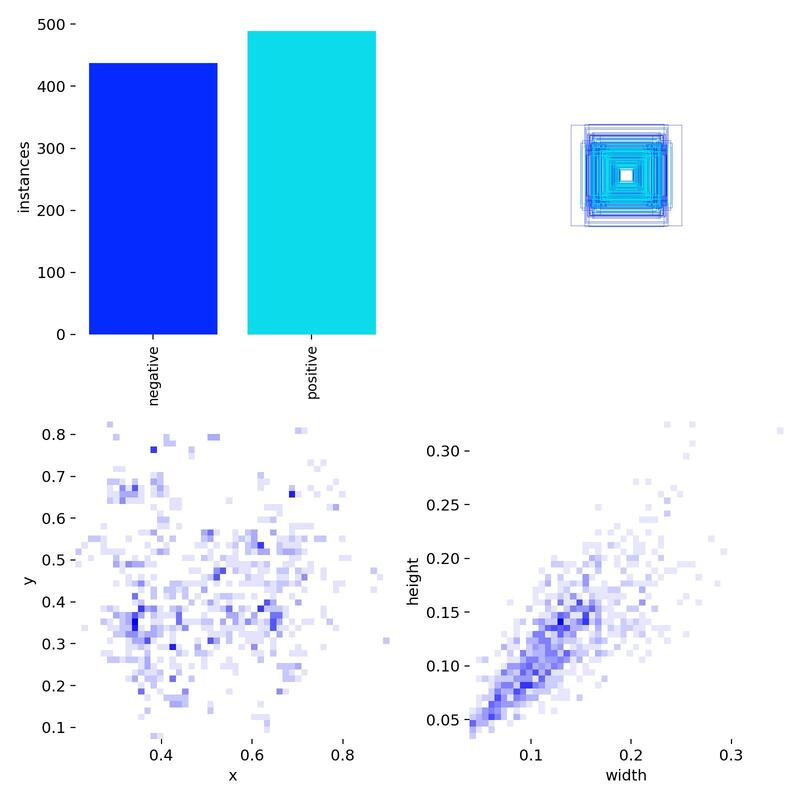

# Yolo 형식의 객체탐지 라벨 형식

**예시 라벨: 1 0.344484 0.342723 0.221831 0.176056**


| 항목         | 값                   | 의미                                   |
| ---------- | ------------------- | ------------------------------------ |
| `1`        | 클래스 ID              | 해당 객체가 클래스 1에 해당함                    |
| `0.344484` | 중심 x 좌표 (x\_center) | 이미지 너비의 비율로 표현된 중심점 x (예: 34.4%)     |
| `0.342723` | 중심 y 좌표 (y\_center) | 이미지 높이의 비율로 표현된 중심점 y (예: 34.3%)     |
| `0.221831` | 너비 (width)          | 이미지 너비의 비율로 표현된 바운딩 박스 너비 (예: 22.2%) |
| `0.176056` | 높이 (height)         | 이미지 높이의 비율로 표현된 바운딩 박스 높이 (예: 17.6%) |


**라벨 시각화 예시**

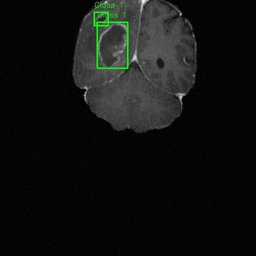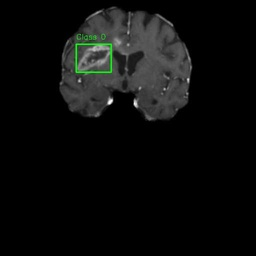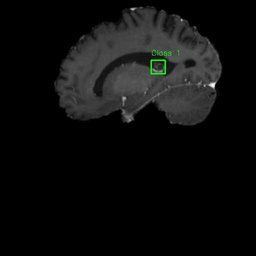

# Ⅰ. CT 데이터의 특성

## 1. 의료 영상의 특성

*   모달리티 (Modality): 대부분의 뇌종양 데이터셋은 MRI (자기공명영상) 또는 CT (컴퓨터 단층 촬영) 이미지로 구성됩니다. MRI는 연부 조직 대조도가 뛰어나 뇌 조직과 종양을 구별하는 데 유리하며, CT는 뼈와 출혈을 잘 보여줍니다.
*   그레이 스케일 이미지 (Grayscale Images): 일반적으로 흑백 이미지로 구성되며, 각 픽셀 값은 HU (Hounsfield Unit) (CT의 경우) 또는 특정 신호 강도 (MRI의 경우)를 나타냅니다.
*   다양한 촬영 슬라이스 (Multiple Slices): 뇌종양은 3차원 구조이므로, 일반적으로 여러 장의 2D 슬라이스로 구성된 시리즈 형태로 제공됩니다. YOLO는 주로 2D 이미지에 적용되지만, 3D 데이터를 2D 슬라이스로 분할하거나, 각 슬라이스에 YOLO를 적용한 후 3D 재구성하는 방식이 사용됩니다.

## 2. YOLO 형식에 맞는 데이터 구조:



*   이미지 파일: .jpg, .png, .dicom 등 다양한 이미지 포맷으로 저장됩니다.

*   어노테이션 파일 (Annotation Files): YOLO 모델은 이미지 내의 객체 위치(바운딩 박스)와 클래스 정보를 필요로 합니다. 뇌종양 데이터셋의 어노테이션 파일은 일반적으로 다음 정보를 포함합니다.
  - 클래스 ID: 종양의 종류(예: 뇌종양, 양성, 악성 등)를 나타내는 숫자 ID.
  - 정규화된 바운딩 박스 좌표: (center_x, center_y, width, height) 형식으로, 이미지 크기에 따라 0에서 1 사이로 정규화된 값입니다. 예를 들어, 0 0.5 0.5 0.2 0.3은 0번 클래스(예: 뇌종양), 중심 x 좌표 0.5, 중심 y 좌표 0.5, 너비 0.2, 높이 0.3인 바운딩 박스를 의미합니다. 이 정보는 각 이미지에 대한 .txt 파일로 저장됩니다.
*  데이터셋 분할: 학습(training), 검증(validation), 테스트(test) 세트로 명확히 분할되어 제공됩니다. 이는 모델의 일반화 성능을 평가하는 데 중요합니다.

*   dataset.yaml 파일: Ultralytics YOLO와 같은 프레임워크에서는 데이터셋의 경로, 클래스 이름, 이미지 개수 등을 정의하는 dataset.yaml 파일이 함께 제공됩니다.

## 3. 뇌종양 특성을 반영한 어노테이션



*   클래스 정의: 데이터셋에 따라 뇌종양의 종류(예: Glioma, Meningioma, Pituitary tumor)를 세분화하거나, 단순히 '종양' 또는 '정상/비정상'으로 분류하는 경우가 있습니다. 어떤 데이터셋은 '종양 없음(No Tumor)' 클래스도 포함합니다.

*   바운딩 박스 정확도: 의료 영상에서 종양의 정확한 위치를 바운딩 박스로 표시하는 것은 매우 중요합니다. 어노테이션의 품질은 모델의 탐지 성능에 직접적인 영향을 미칩니다.
*   작은 객체 (Small Objects): 초기 단계의 종양은 매우 작을 수 있습니다. YOLO 모델은 작은 객체 탐지에 어려움을 겪을 수 있으므로, 이러한 데이터셋에서는 FPN(Feature Pyramid Network)과 같은 기술을 활용하여 다양한 스케일의 특징을 학습하도록 합니다.

## 4. 데이터셋 크기 및 다양성

* 뇌종양 데이터셋은 수백 장에서 수천 장의 이미지로 구성될 수 있습니다. 데이터셋의 크기와 다양성(환자 수, 종양의 크기, 모양, 위치 다양성)은 모델의 강건성을 높이는 데 중요합니다.

* 클래스 불균형 (Class Imbalance): 정상 이미지에 비해 종양 이미지가 적거나, 특정 유형의 종양이 다른 유형보다 훨씬 적게 나타나는 클래스 불균형 문제가 있을 수 있습니다. 이는 모델 학습 시 고려되어야 합니다.

## 5. 예시 데이터셋 (Ultralytics YOLO Docs):


Ultralytics YOLO 문서에서 소개하는 뇌종양 데이터셋은 다음과 같은 특징을 가집니다.

* 원본: MRI 또는 CT 스캔 이미지 (정확한 모달리티는 데이터셋마다 상이)

* 클래스: 주로 'positive (종양 있음)' 또는 'negative (종양 없음)'의 이진 분류 또는 특정 종양 유형 (Glioma, Meningioma, Pituitary tumor, No Tumor)으로 분류됩니다.

* 포맷: YOLO 학습에 적합한 .txt 어노테이션 파일과 이미지 파일로 구성됩니다.

* 구성: 학습, 검증, 테스트 세트로 나뉘어 있으며, 각 세트별 이미지 수와 어노테이션 정보가 명시됩니다.

# Ⅱ. 뇌종양 이미지데이터 다운로드

pip install ultralytics


In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n.pt")  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data="brain-tumor.yaml", epochs=100, imgsz=640)

# Ⅲ. 뇌종양 이미지데이터 전처리



## Training Data 전처리

의료용 데이터, 특히 영상 데이터(예: MRI, CT, X-ray, 병리 이미지 등)는 일반 이미지와는 달리 임상적으로 중요한 특징을 담고 있기 때문에 전처리 과정에서 매우 신중해야 합니다.

| 기법명                       | 설명                               | 함수명                        |
| ------------------------- | -------------------------------- | -------------------------- |
| **Z-score 정규화**           | 이미지 픽셀 값을 평균 0, 표준편차 1로 스케일링     | `normalize_zscore()`       |
| **CLAHE (적응형 히스토그램 평활화)** | 국소 대비 향상, 의료 영상에서 유용             | `apply_clahe()`            |
| **가우시안 블러**               | 노이즈 제거 및 부드럽게 처리, 데이터 증강용        | `apply_gaussian_blur()`    |
| **샤프닝 필터**                | 경계 및 세부 구조 강조                    | `sharpen_image()`          |
| **밝기 조절**                 | 이미지 밝기 증가, 데이터 증강용               | `adjust_brightness()`      |
| **히스토그램 평활화**             | 이미지 전체 대비 향상 (밝기 분포 균일화)         | `histogram_equalization()` |
| **가우시안 노이즈 추가**           | Gaussian Noise 추가로 모델의 일반화 능력 향상 | `add_gaussian_noise()`     |


In [ ]:
import os
import cv2
import numpy as np
from PIL import Image, ImageEnhance

# ✅ Z-score 정규화
def normalize_zscore(img):
    img = img.astype(np.float32)
    mean = np.mean(img)
    std = np.std(img) + 1e-8
    return (img - mean) / std

# ✅ CLAHE (국소 대비 향상)
def apply_clahe(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(gray)
    return cv2.cvtColor(enhanced, cv2.COLOR_GRAY2BGR)

# ✅ Gaussian Blur
def apply_gaussian_blur(img, ksize=(3, 3)):
    return cv2.GaussianBlur(img, ksize, 0)

# ✅ Sharpening
def sharpen_image(img):
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    return cv2.filter2D(img, -1, kernel)

# ✅ Brightness Adjustment
def adjust_brightness(img, factor=1.2):
    pil_img = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    enhancer = ImageEnhance.Brightness(pil_img)
    bright_img = enhancer.enhance(factor)
    return cv2.cvtColor(np.array(bright_img), cv2.COLOR_RGB2BGR)

# ✅ Histogram Equalization
def histogram_equalization(img):
    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])
    return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

# ✅ Add Gaussian Noise
def add_gaussian_noise(img, mean=0, std=10):
    noise = np.random.normal(mean, std, img.shape).astype(np.float32)
    noisy = img.astype(np.float32) + noise
    noisy = np.clip(noisy, 0, 255)
    return noisy.astype(np.uint8)

# ✅ YOLO 라벨 복사 함수
def copy_label_file(label_input_folder, base_name, suffix, label_output_folder):
    input_label_path = os.path.join(label_input_folder, base_name + ".txt")
    output_label_path = os.path.join(label_output_folder, f"{base_name}_{suffix}.txt")

    if os.path.exists(input_label_path):
        with open(input_label_path, "r") as infile:
            label_data = infile.read()
        os.makedirs(label_output_folder, exist_ok=True)
        with open(output_label_path, "w") as outfile:
            outfile.write(label_data)
    else:
        print(f"[경고] 라벨 없음: {input_label_path}")

# ✅ 이미지 전처리 및 저장
def process_and_save_all_images(image_input_folder, label_input_folder, image_output_folder, label_output_folder):
    os.makedirs(image_output_folder, exist_ok=True)
    os.makedirs(label_output_folder, exist_ok=True)

    for filename in os.listdir(image_input_folder):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(image_input_folder, filename)
            img = cv2.imread(img_path)

            if img is None:
                print(f"[경고] 이미지를 열 수 없음: {img_path}")
                continue

            base_name = os.path.splitext(filename)[0]
            print(f"[INFO] 처리 중: {filename}")

            try:
                # 전처리
                transformations = {
                    "normalized": normalize_zscore(img),
                    "clahe": apply_clahe(img),
                    "blurred": apply_gaussian_blur(img),
                    "sharpened": sharpen_image(img),
                    "bright": adjust_brightness(img),
                    "histogram_eq": histogram_equalization(img),
                    "noisy": add_gaussian_noise(img),
                }

                for suffix, processed_img in transformations.items():
                    output_img_path = os.path.join(image_output_folder, f"{base_name}_{suffix}.jpg")

                    # 저장 시 uint8 형 변환 필요 시 수행
                    if processed_img.dtype != np.uint8:
                        processed_img = cv2.normalize(processed_img, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

                    cv2.imwrite(output_img_path, processed_img)

                    # 라벨 저장
                    copy_label_file(label_input_folder, base_name, suffix, label_output_folder)

            except Exception as e:
                print(f"[에러] {filename} 처리 중 문제 발생: {e}")

# ✅ 실행
if __name__ == "__main__":
    image_input_folder = "datasets/brain-tumor/train/images"     # 원본 이미지 폴더
    label_input_folder = "datasets/brain-tumor/train/labels"     # 원본 라벨 폴더
    image_output_folder = "processed_train_images"                     # 전처리된 이미지 저장
    label_output_folder = "processed_train_labels"                     # 전처리된 라벨 저장

    process_and_save_all_images(image_input_folder, label_input_folder, image_output_folder, label_output_folder)

print('finish')

**원본이미지**

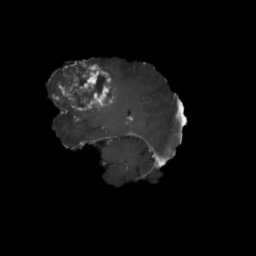

**Z-score 정규화**

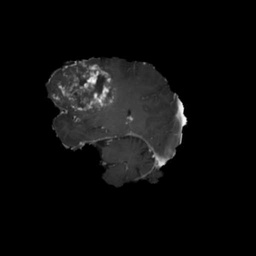

**CLAHE**

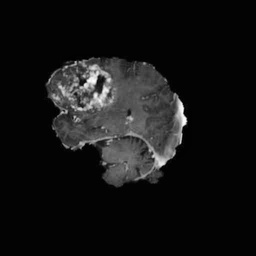

**Gaussian Blur**

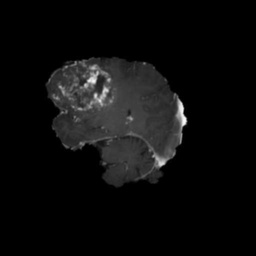

**Sharpening**

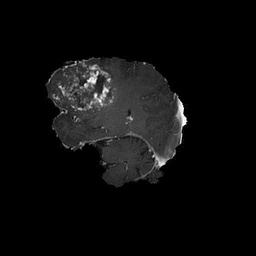

**Brightness Adjustment**

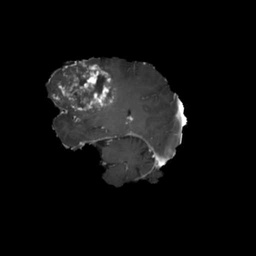

**Histogram Equalization**

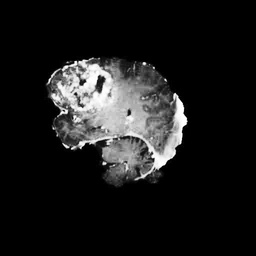

**Add Gaussian Noise**

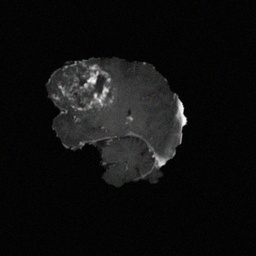

## Valid Data 전처리

증강 기법(회전, 밝기, 노이즈 등)은 훈련 데이터에만 적용하여 모델이 더 강인해지도록 돕고

검증 및 테스트 데이터는 원본 또는 최소한의 정규화만 적용해 모델 성능을 공정하고 정확히 평가하기 때문에 증강기법은 전처리는 하지 않는다.

In [ ]:
import os
import cv2
import numpy as np
from PIL import Image, ImageEnhance

# ✅ Z-score 정규화
def normalize_zscore(img):
    img = img.astype(np.float32)
    mean = np.mean(img)
    std = np.std(img) + 1e-8
    return (img - mean) / std

# ✅ CLAHE (국소 대비 향상)
def apply_clahe(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(gray)
    return cv2.cvtColor(enhanced, cv2.COLOR_GRAY2BGR)

# ✅ Sharpening CLAHE (국소 대비 향상) Z-score 정규화
def sharpen_image(img):
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    return cv2.filter2D(img, -1, kernel)

# ✅ Histogram Equalization
def histogram_equalization(img):
    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])
    return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

# ✅ YOLO 라벨 복사 함수
def copy_label_file(label_input_folder, base_name, suffix, label_output_folder):
    input_label_path = os.path.join(label_input_folder, base_name + ".txt")
    output_label_path = os.path.join(label_output_folder, f"{base_name}_{suffix}.txt")

    if os.path.exists(input_label_path):
        with open(input_label_path, "r") as infile:
            label_data = infile.read()
        os.makedirs(label_output_folder, exist_ok=True)
        with open(output_label_path, "w") as outfile:
            outfile.write(label_data)
    else:
        print(f"[경고] 라벨 없음: {input_label_path}")

# ✅ 이미지 전처리 및 저장
def process_and_save_all_images(image_input_folder, label_input_folder, image_output_folder, label_output_folder):
    os.makedirs(image_output_folder, exist_ok=True)
    os.makedirs(label_output_folder, exist_ok=True)

    for filename in os.listdir(image_input_folder):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(image_input_folder, filename)
            img = cv2.imread(img_path)

            if img is None:
                print(f"[경고] 이미지를 열 수 없음: {img_path}")
                continue

            base_name = os.path.splitext(filename)[0]
            print(f"[INFO] 처리 중: {filename}")

            try:
                # 전처리
                transformations = {
                    "normalized": normalize_zscore(img),
                    "clahe": apply_clahe(img),
                    "sharpened": sharpen_image(img),
                    "histogram_eq": histogram_equalization(img),
                }

                for suffix, processed_img in transformations.items():
                    output_img_path = os.path.join(image_output_folder, f"{base_name}_{suffix}.jpg")

                    # 저장 시 uint8 형 변환 필요 시 수행
                    if processed_img.dtype != np.uint8:
                        processed_img = cv2.normalize(processed_img, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

                    cv2.imwrite(output_img_path, processed_img)

                    # 라벨 저장
                    copy_label_file(label_input_folder, base_name, suffix, label_output_folder)

            except Exception as e:
                print(f"[에러] {filename} 처리 중 문제 발생: {e}")

# ✅ 실행
if __name__ == "__main__":
    image_input_folder = "datasets/brain-tumor/valid\images"     # 원본 이미지 폴더
    label_input_folder = "datasets/brain-tumor/valid\labels"     # 원본 라벨 폴더
    image_output_folder = "processed_vaild_images"                     # 전처리된 이미지 저장
    label_output_folder = "processed_vaild_labels"                     # 전처리된 라벨 저장

    process_and_save_all_images(image_input_folder, label_input_folder, image_output_folder, label_output_folder)

print('finish')

**원본 이미지**

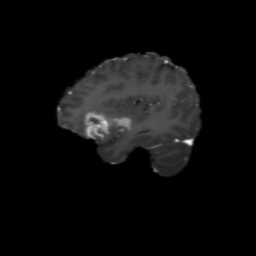

**Z-score 정규화**

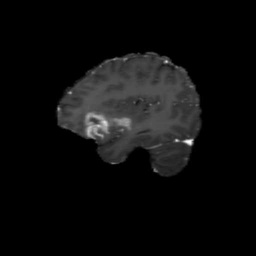

**CLAHE**

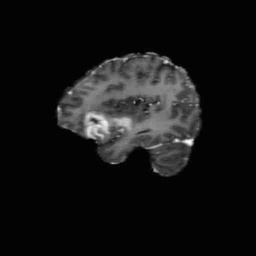

**Sharpening**

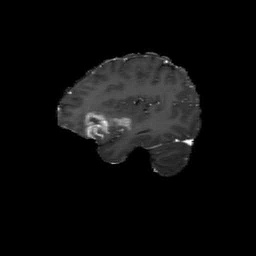

**Histogram Equalization**

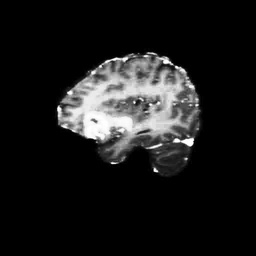
